<a href="https://colab.research.google.com/github/DS3001/group2/blob/main/DS3001_Group_2_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# DS 3001: Project 2 - Stroke
**Group 2: Elaine Zhang, Eric Nguyen,**
  - zzb2rf, wvu9cs,
  - Any questions or comments about this report should be directted to the authors.



---
## Import Statements

In [12]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
## Data Cleaning:
  - In this section, we perform data cleaning techniques to make the dataset acceptable for data manipulation. Techniques included loading the provided dataset into the notebook, defining the variables, testing missing and NAN values, dropping columns, and making categorical variables. These techniques set the foundation for further sections and is imperative to conduct properly.

Variable Definitions:
- **age**: Patient age, numeric
- **avg_glucose_level**: Blood sugar levels, numeric
- **bmi**: Body mass index, numeric
- **ever_married**: Ever married, dummy/character (Yes, No)
- **gender**: Male, Female, or Other, character
- **heart_disease**: Has heart disease, dummy
- **hypertension**: Has hypertension, dummy
- **id**: Study identification number
- **Residence_type**: Type of residence, dummy/character (Urban, Rural)
- **smoking_status**: Former, never, or current smoker, categorical
- **work_type**: Employment type (Never worked (Never_worked), homemaker ("children"), Public sector employment (Govt_job), Private sector employment (Private), Self-employed (Self-employed)
- **stroke**: Suffered a stroke in the sample period

In [13]:
training_data = pd.read_csv('training_data.csv')
testing_data = pd.read_csv('testing_data.csv')
training_data.columns

Index(['Unnamed: 0', 'id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [14]:
print('Training size', training_data.shape)
print('Testing size', testing_data.shape)

Training size (4087, 13)
Testing size (1023, 13)


In [15]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4087 non-null   int64  
 1   id                 4087 non-null   int64  
 2   gender             4087 non-null   object 
 3   age                4087 non-null   float64
 4   hypertension       4087 non-null   int64  
 5   heart_disease      4087 non-null   int64  
 6   ever_married       4087 non-null   object 
 7   work_type          4087 non-null   object 
 8   Residence_type     4087 non-null   object 
 9   avg_glucose_level  4087 non-null   float64
 10  bmi                3928 non-null   float64
 11  smoking_status     4087 non-null   object 
 12  stroke             4087 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 415.2+ KB


In [16]:
# Missing values?
print("Training NaN --")
nan_details = training_data.isnull().sum()
for column, value in nan_details.items():
  if (value != 0):
    print(column, value)

print("Testing NaN --")
nan_details = testing_data.isnull().sum()
for column, value in nan_details.items():
  if (value != 0):
    print(column, value)

Training NaN --
bmi 159
Testing NaN --
bmi 42


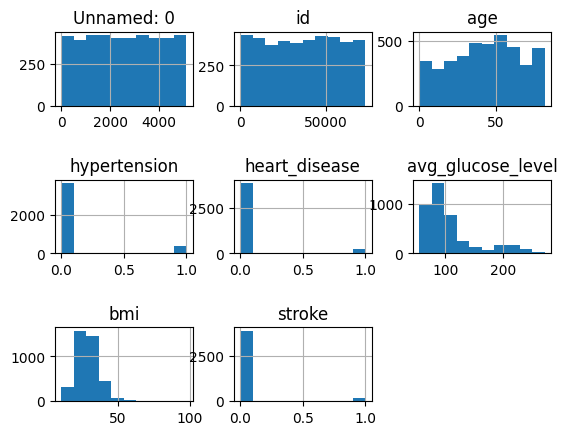

In [17]:
# looking at the spread
training_data.hist()
plt.subplots_adjust(hspace=1)
plt.show()

In [18]:
# drop Unamed: 0 because don't know what that column is
# drop id, because the id of the person should have no impact on the model
training_data = training_data.drop(columns=['Unnamed: 0', 'id'])
testing_data = testing_data.drop(columns=['Unnamed: 0', 'id'])

In [19]:
training_data['heart_disease'].unique()

array([0, 1], dtype=int64)

In [20]:
# Make hypertension, stroke, heart_disease categorical because they are binary labels
binary_columns = ['hypertension', 'heart_disease', 'stroke']
training_data[binary_columns] = training_data[binary_columns].astype('object')
testing_data[binary_columns] = testing_data[binary_columns].astype('object')

In [21]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4087 non-null   object 
 1   age                4087 non-null   float64
 2   hypertension       4087 non-null   object 
 3   heart_disease      4087 non-null   object 
 4   ever_married       4087 non-null   object 
 5   work_type          4087 non-null   object 
 6   Residence_type     4087 non-null   object 
 7   avg_glucose_level  4087 non-null   float64
 8   bmi                3928 non-null   float64
 9   smoking_status     4087 non-null   object 
 10  stroke             4087 non-null   object 
dtypes: float64(3), object(8)
memory usage: 351.4+ KB


## Data Visualization
  - To effectively understand the data, we've performed several data visualizations that highlight different aspects of the training data. Initial charts include data exploration and latter graphs will provide complex relationships between variables. Creating data visualizations is an important aspect of any project as it helps make the data accessible and understandable for the wider audience. Any questions regarding these charts should be directed to the authors.

C:\Users\chery\AppData\Local\Temp\ipykernel_10292\355889768.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = training_data.corr()


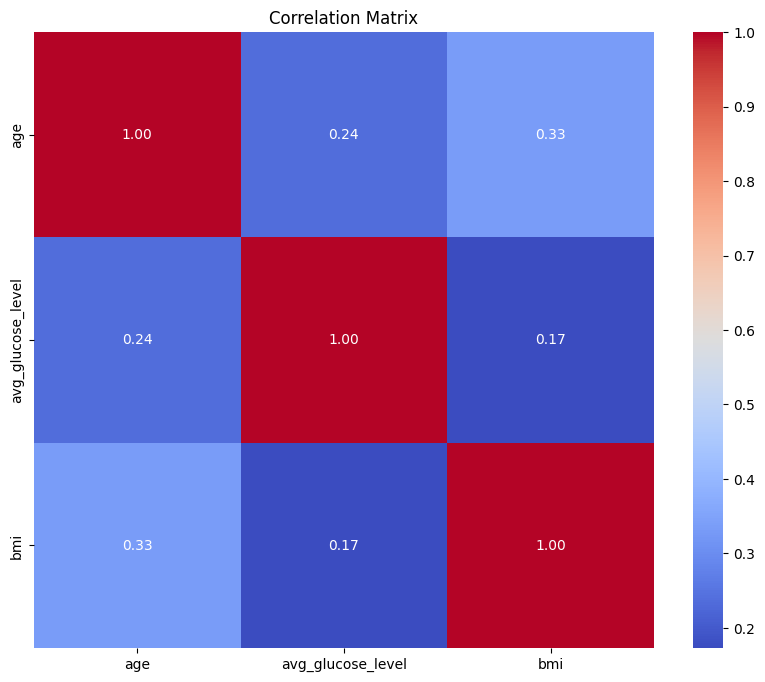

In [22]:
import plotly.express as px

# Visualize the correlation matrix using a heatmap
correlation_matrix = training_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

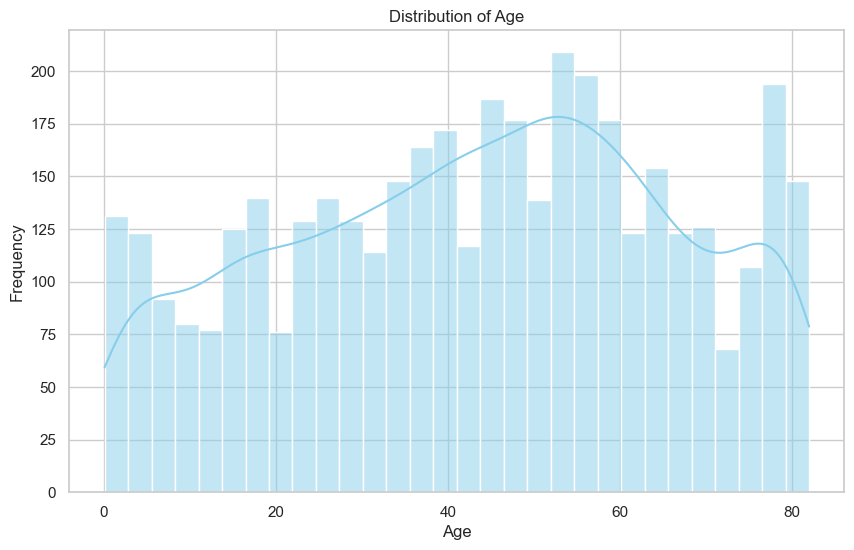

In [23]:
sns.set(style="whitegrid")

# Visualize the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(training_data['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

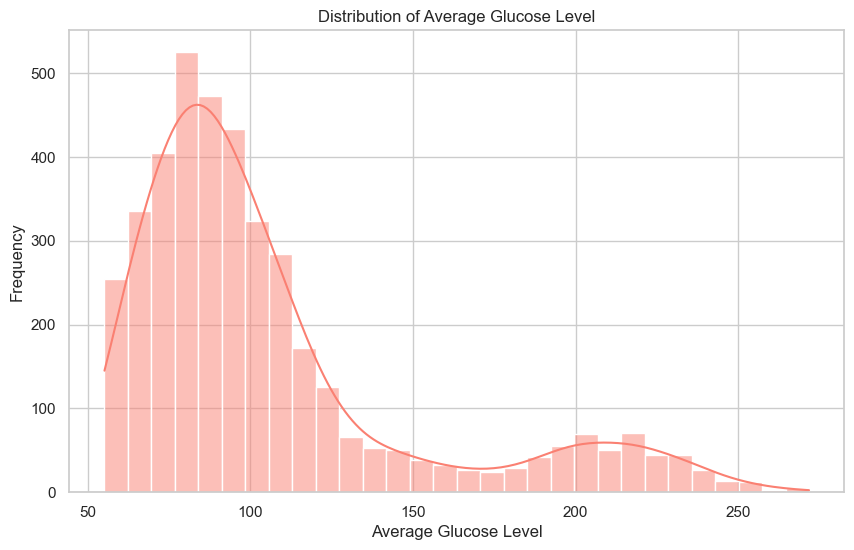

In [24]:
# Visualize the distribution of average glucose level
plt.figure(figsize=(10, 6))
sns.histplot(training_data['avg_glucose_level'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()

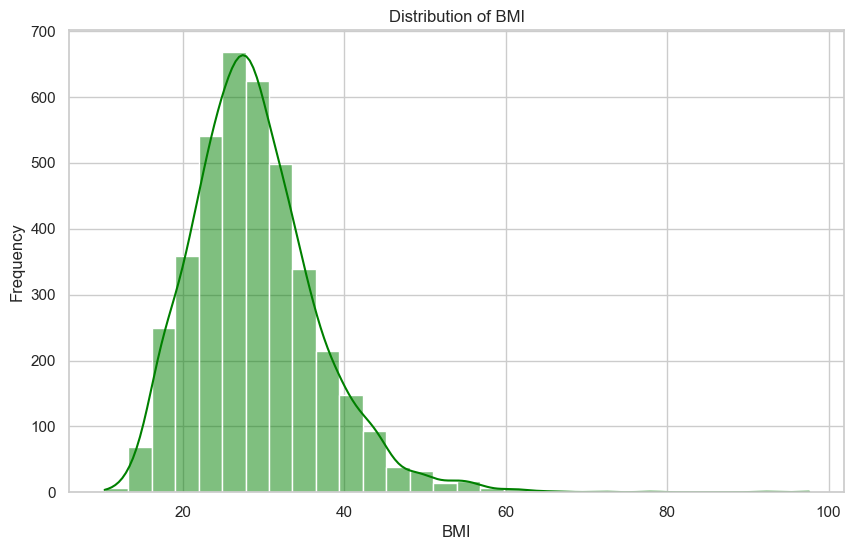

In [25]:
# Visualize the distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(training_data['bmi'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

C:\Users\chery\AppData\Local\Temp\ipykernel_10292\1770418833.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=training_data, palette='pastel')


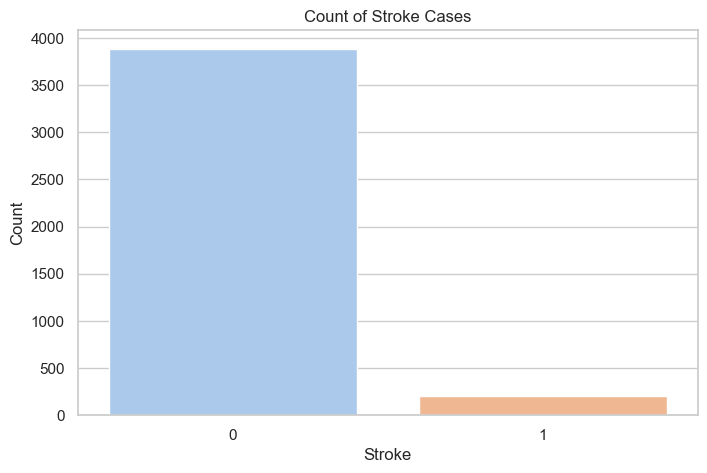

In [26]:
# Visualize the count of strokes
plt.figure(figsize=(8, 5))
sns.countplot(x='stroke', data=training_data, palette='pastel')
plt.title('Count of Stroke Cases')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

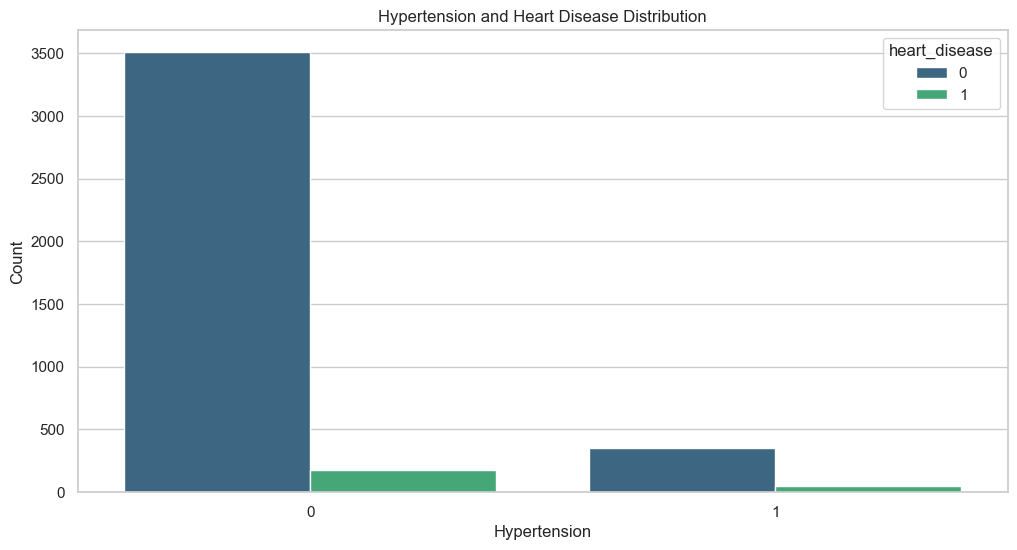

In [27]:
# Visualize the distribution of hypertension and heart disease
plt.figure(figsize=(12, 6))
sns.countplot(x='hypertension', data=training_data, hue='heart_disease', palette='viridis')
plt.title('Hypertension and Heart Disease Distribution')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

C:\Users\chery\AppData\Local\Temp\ipykernel_10292\4210332511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='age', data=training_data, palette='Blues')


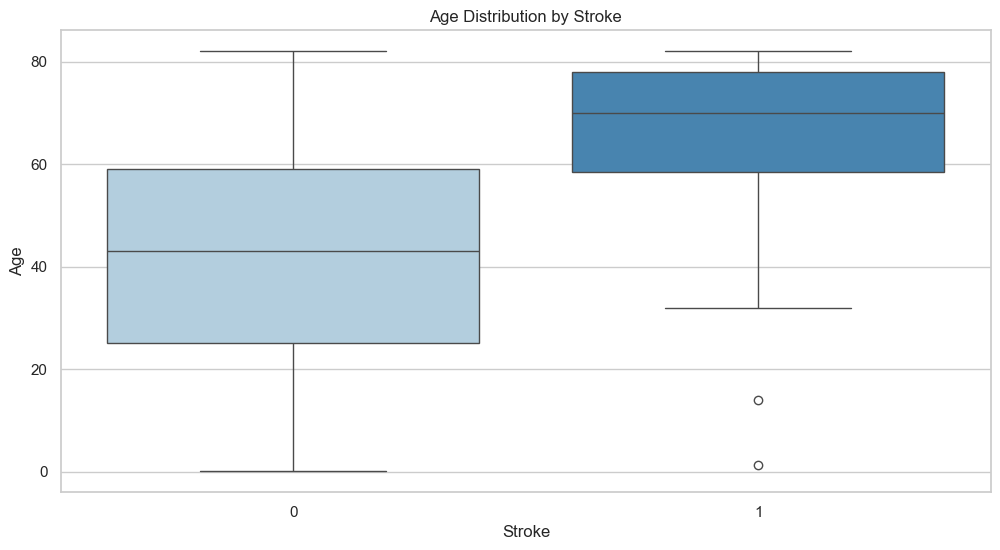

In [28]:
# Visualize the relationship between age and stroke
plt.figure(figsize=(12, 6))
sns.boxplot(x='stroke', y='age', data=training_data, palette='Blues')
plt.title('Age Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

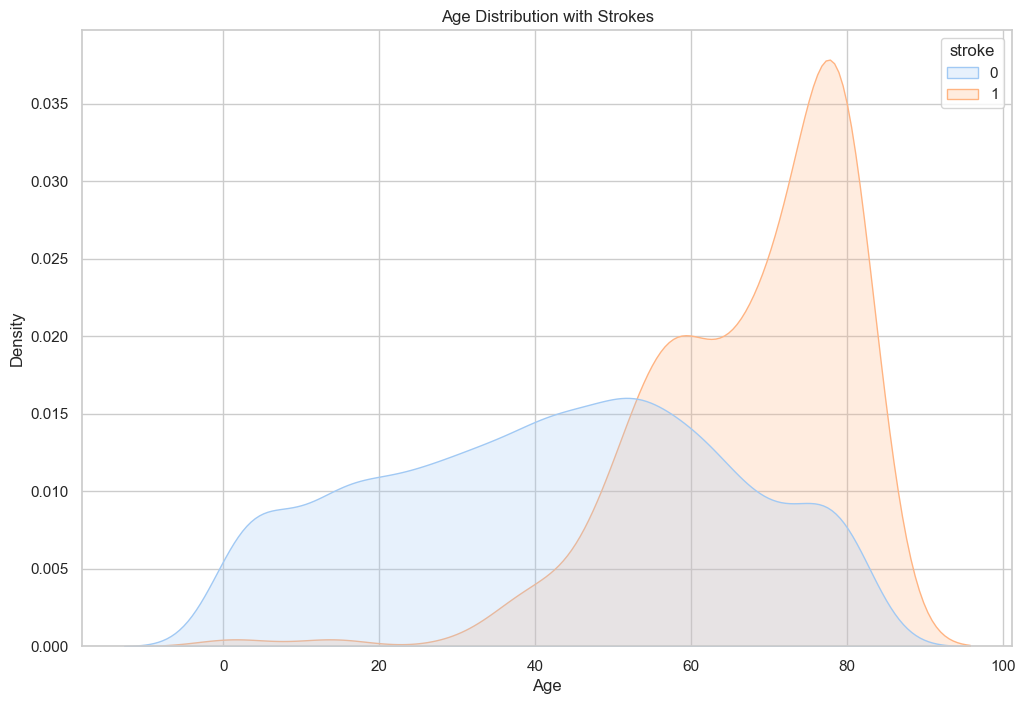

In [29]:
# Age distribution with strokes
plt.figure(figsize=(12, 8))
sns.kdeplot(data=training_data, x='age', hue='stroke', common_norm=False, fill=True, palette='pastel')
plt.title('Age Distribution with Strokes')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

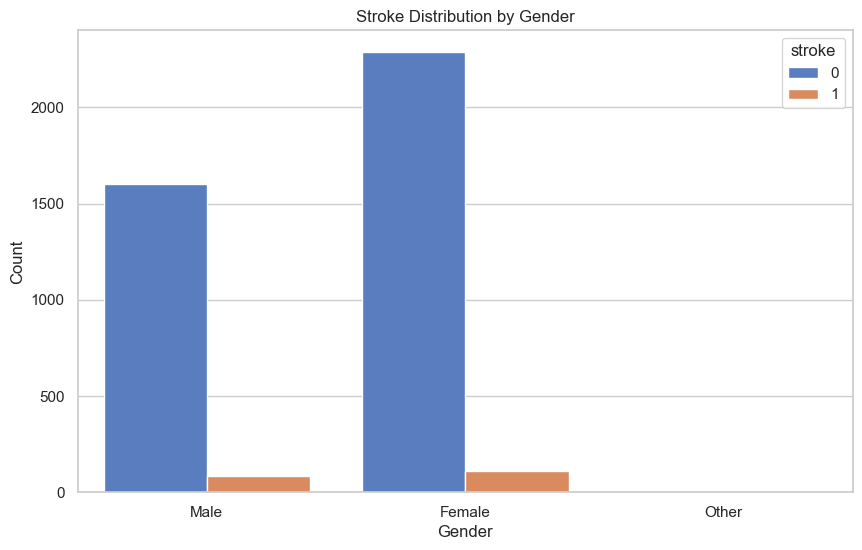

In [30]:
# Visualize the distribution of stroke by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=training_data, hue='stroke', palette='muted')
plt.title('Stroke Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [31]:
# Interactive scatter plot for age vs. glucose level with stroke as color
fig = px.scatter(training_data, x='age', y='avg_glucose_level', color='stroke',
                 labels={'avg_glucose_level': 'Average Glucose Level'},
                 title='Scatter Plot of Age vs. Average Glucose Level with Stroke Color')
fig.show()

In [32]:
# Interactive bar plot for work type and stroke count
work_type_stroke_count = training_data.groupby(['work_type', 'stroke']).size().reset_index(name='count')
fig = px.bar(work_type_stroke_count, x='work_type', y='count', color='stroke',
             labels={'count': 'Count', 'work_type': 'Work Type'},
             title='Bar Plot of Stroke Count by Work Type')
fig.show()

In [33]:
# Interactive pie chart for smoking status distribution
smoking_status_distribution = training_data['smoking_status'].value_counts().reset_index(name='count')
fig = px.pie(smoking_status_distribution, values='count', names='index',
             title='Pie Chart of Smoking Status Distribution')
fig.show()

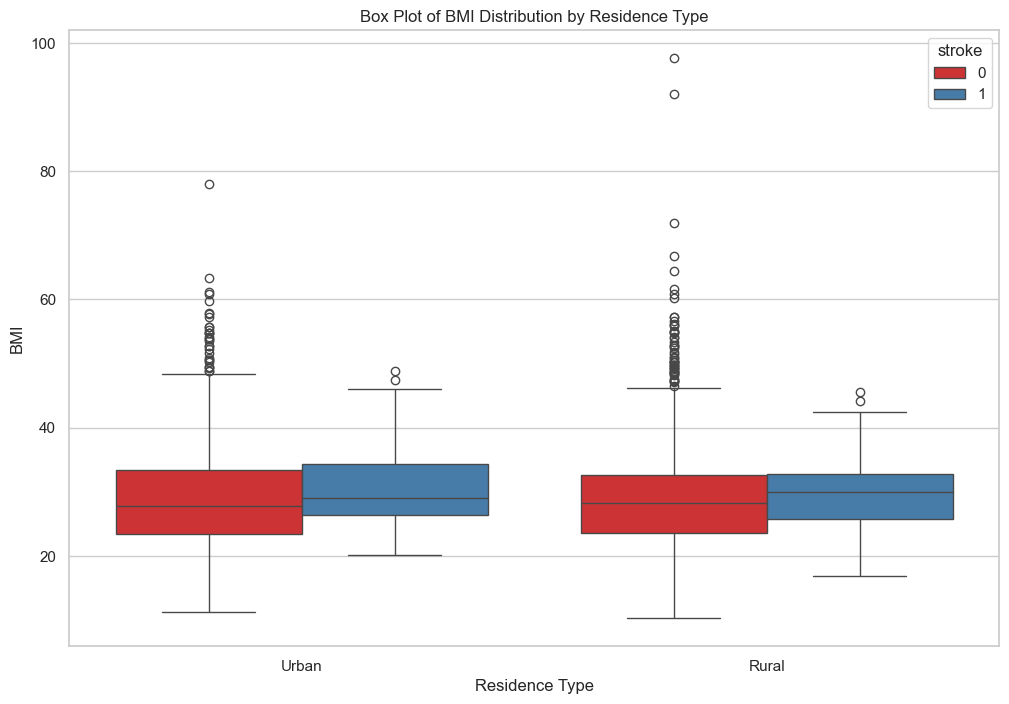

In [34]:
# Box plot for BMI distribution by residence type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Residence_type', y='bmi', data=training_data, hue='stroke', palette='Set1')
plt.title('Box Plot of BMI Distribution by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('BMI')
plt.show()

In [35]:
# Relationship between BMI and average glucose level with stroke as color
fig = px.scatter(training_data, x='bmi', y='avg_glucose_level', color='stroke',
                 labels={'avg_glucose_level': 'Average Glucose Level'},
                 title='Scatter Plot of BMI vs. Average Glucose Level with Stroke Color')
fig.show()

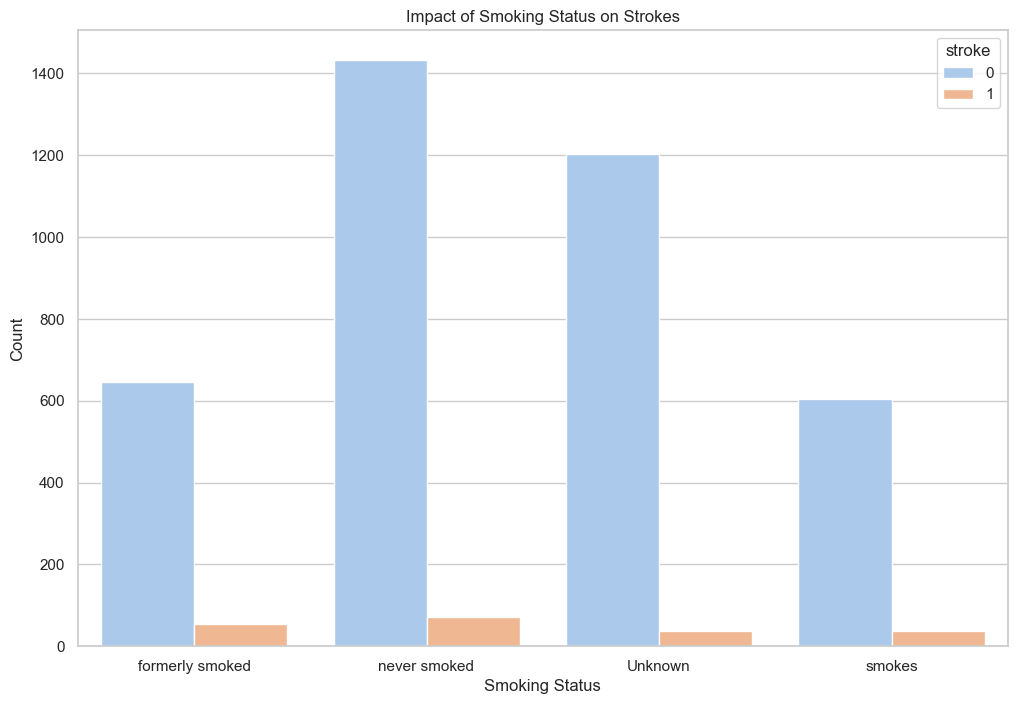

In [36]:
# Smoking Status and Stroke
plt.figure(figsize=(12, 8))
sns.countplot(x='smoking_status', hue='stroke', data=training_data, palette='pastel')
plt.title('Impact of Smoking Status on Strokes')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

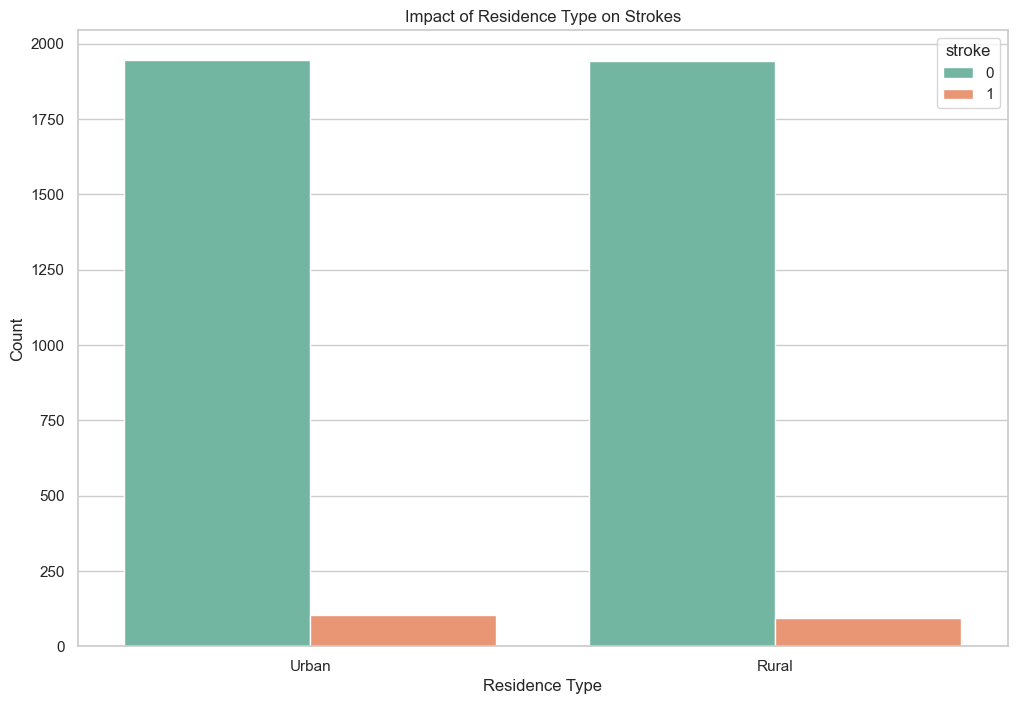

In [37]:
# Residence Type and Stroke
plt.figure(figsize=(12, 8))
sns.countplot(x='Residence_type', hue='stroke', data=training_data, palette='Set2')
plt.title('Impact of Residence Type on Strokes')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.show()

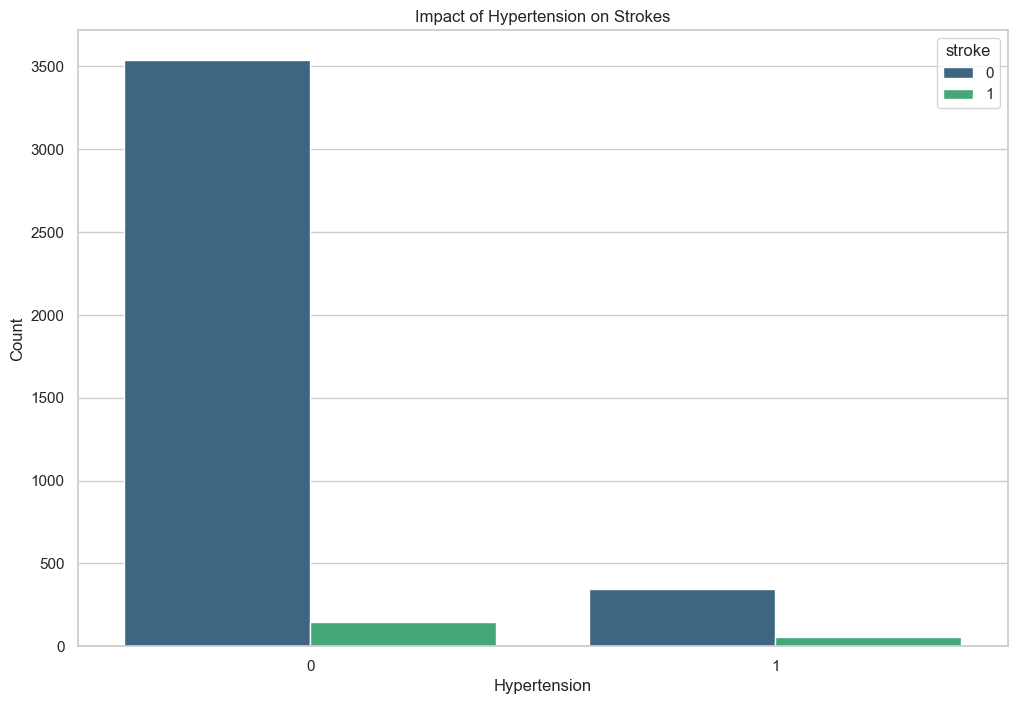

In [38]:
# Hypertension and Heart Disease Impact on Stroke
plt.figure(figsize=(12, 8))
sns.countplot(x='hypertension', hue='stroke', data=training_data, palette='viridis')
plt.title('Impact of Hypertension on Strokes')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

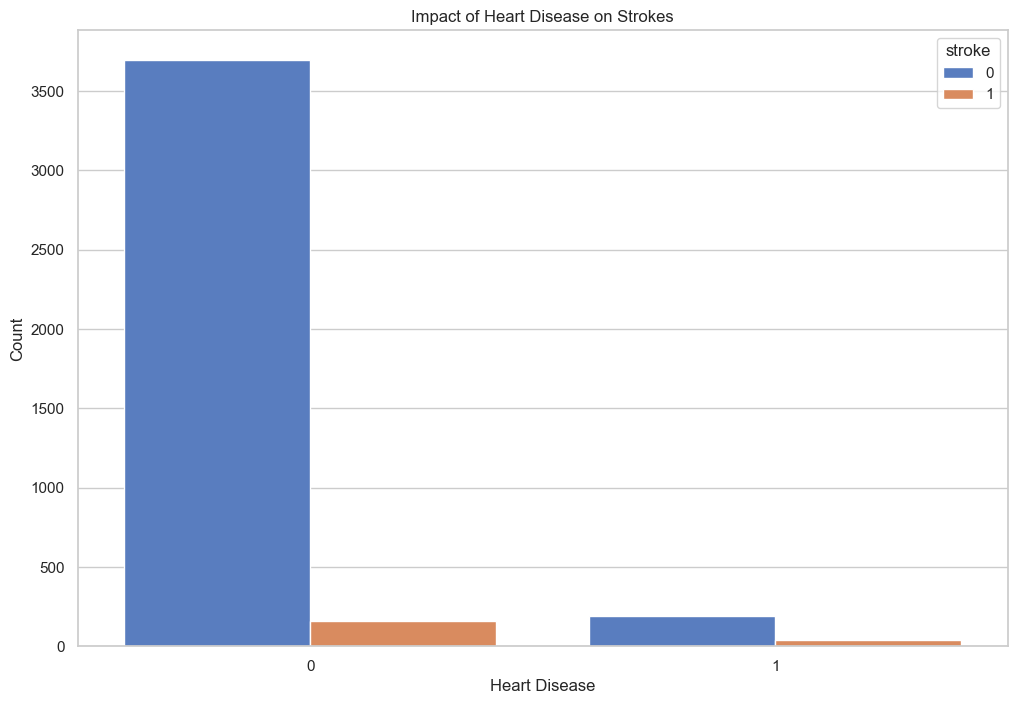

In [39]:
plt.figure(figsize=(12, 8))
sns.countplot(x='heart_disease', hue='stroke', data=training_data, palette='muted')
plt.title('Impact of Heart Disease on Strokes')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

In [40]:
import plotly.graph_objects as go

# Work Type and Average Glucose Level
fig = px.box(training_data, x='work_type', y='avg_glucose_level', color='work_type',
             labels={'avg_glucose_level': 'Average Glucose Level'},
             title='Box Plot of Average Glucose Level by Work Type')
fig.show()

In [41]:
# Gender and Average Glucose Level
fig = px.box(training_data, x='gender', y='avg_glucose_level', color='gender',
             labels={'avg_glucose_level': 'Average Glucose Level'},
             title='Box Plot of Average Glucose Level by Gender')
fig.show()

In [42]:
# Age and Smoking Status
fig = go.Figure()

for status in training_data['smoking_status'].unique():
    subset = training_data[training_data['smoking_status'] == status]
    fig.add_trace(go.Box(x=subset['smoking_status'], y=subset['age'], name=status))

fig.update_layout(title='Box Plot of Age by Smoking Status',
                  xaxis_title='Smoking Status',
                  yaxis_title='Age')
fig.show()

---
## Models
  - In this section... (Cheryl and Hieu summarize this part)

In [46]:
# split data into features and the target labels
X_train = training_data.drop(columns=['stroke'])
y_train = training_data["stroke"].copy()

X_test = testing_data.drop(columns=['stroke'])
y_test = testing_data["stroke"].copy()

In [47]:
training_num = X_train.select_dtypes(include=[np.number])
training_cat = X_train.select_dtypes(exclude=[np.number])
num_attribs = list(training_num)
cat_attribs = list(training_cat)

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("std_scaler", StandardScaler()),

])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_attribs),
])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [52]:
# simple linear regression (no polynomial features)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

reg = LinearRegression().fit(X_train_prepared, y_train)
y_pred = reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred))) 
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.08190438686502433
RMSE on test set: 0.20659021361671462


In [54]:
# linear model (polynomial features degree = 2)
from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures(degree=2)
X_train_prepared_poly = polynomial.fit_transform(X_train_prepared)
X_test_prepared_poly = polynomial.transform(X_test_prepared)

reg = LinearRegression().fit(X_train_prepared_poly, y_train)
y_pred = reg.predict(X_test_prepared_poly)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.052346340296569926
RMSE on test set: 0.2098894505522819


In [55]:
# linear model (polynomial features degree = 3)
polynomial = PolynomialFeatures(degree=3)
X_train_prepared_poly = polynomial.fit_transform(X_train_prepared)
X_test_prepared_poly = polynomial.transform(X_test_prepared)

reg = LinearRegression().fit(X_train_prepared_poly, y_train)
y_pred = reg.predict(X_test_prepared_poly)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: -5.700131845524543e+18
RMSE on test set: 514764085.6125451


In [56]:
# decision tree (depth = 1)
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor(max_depth=1, random_state=42)
tree_reg = tree_reg.fit(X_train_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.06852453491795651
RMSE on test set: 0.20809013821224912


In [57]:
# decision tree (depth = 2)
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg = tree_reg.fit(X_train_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.07934294088245286
RMSE on test set: 0.20687820164821544


In [58]:
# decision tree (depth = 3)
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg = tree_reg.fit(X_train_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.07256700630007884
RMSE on test set: 0.20763810640010064


In [59]:
# decision tree (depth = 4)
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg = tree_reg.fit(X_train_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.07555497004577583
RMSE on test set: 0.20730335680004366


In [60]:
# decision tree (depth = 5)
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg = tree_reg.fit(X_train_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.017222781063939485
RMSE on test set: 0.213743702983762


R2 Score on test set: -0.2429736211031175
RMSE on test set: 0.24037912200990197
SSE:  59.11111111111107


<Axes: ylabel='stroke'>

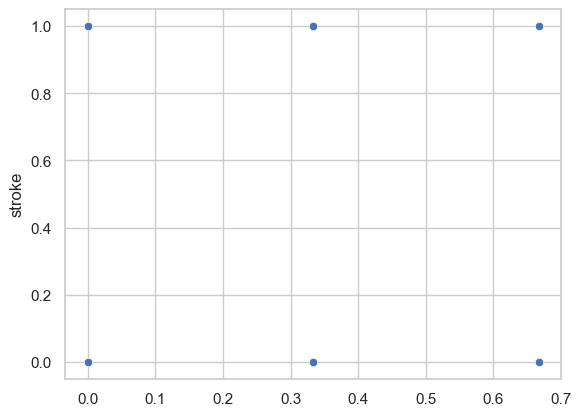

In [66]:
# knn with k = 3
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

model = kNNRegression(n_neighbors = 3)
fitted_model = model.fit(X_train_prepared, y_train)
y_pred = fitted_model.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))
sse = np.sum( (y_test - y_pred)**2 )
print("SSE: ", sse)

sns.scatterplot(x = y_pred, y = y_test)

R2 Score on test set: -0.11362959917780069
RMSE on test set: 0.22752869261447964
SSE:  52.959999999999994


<Axes: ylabel='stroke'>

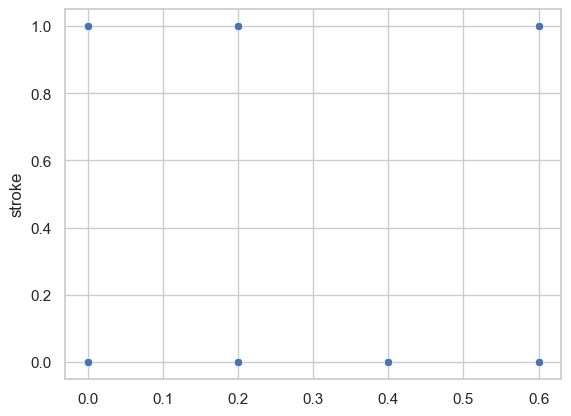

In [67]:
# knn with k = 5
model = kNNRegression(n_neighbors = 5)
fitted_model = model.fit(X_train_prepared, y_train)
y_pred = fitted_model.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))
sse = np.sum( (y_test - y_pred)**2 )
print("SSE: ", sse)

sns.scatterplot(x = y_pred, y = y_test)

R2 Score on test set: -0.014378622816032971
RMSE on test set: 0.21715299956468792
SSE:  48.239999999999995


<Axes: ylabel='stroke'>

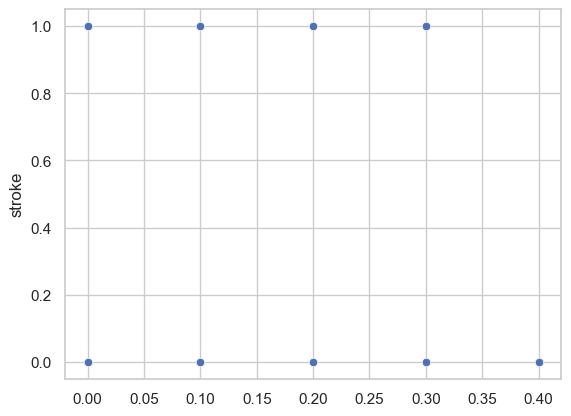

In [68]:
# knn with k = 10
model = kNNRegression(n_neighbors = 10)
fitted_model = model.fit(X_train_prepared, y_train)
y_pred = fitted_model.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))
sse = np.sum( (y_test - y_pred)**2 )
print("SSE: ", sse)

sns.scatterplot(x = y_pred, y = y_test)

R2 Score on test set: 0.0541752251387464
RMSE on test set: 0.20968681902383912
SSE:  44.97983899999997


<Axes: ylabel='stroke'>

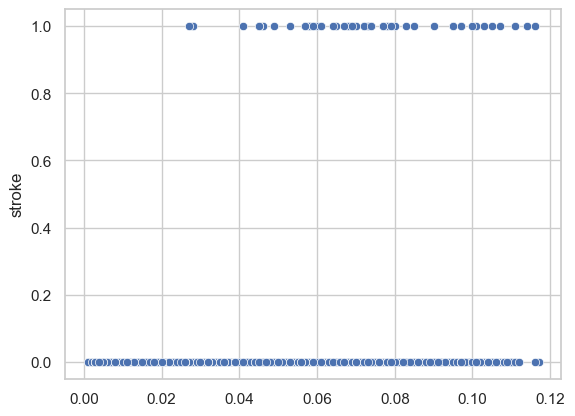

In [80]:
# knn with k = 1000
model = kNNRegression(n_neighbors = 1000)
fitted_model = model.fit(X_train_prepared, y_train)
y_pred = fitted_model.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))
sse = np.sum( (y_test - y_pred)**2 )
print("SSE: ", sse)

sns.scatterplot(x = y_pred, y = y_test)